In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings

In [2]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # moving average time series
    rolstd = timeseries.rolling(window=window).std()    # Moving standard deviation time series
     # Visualize the original time series, moving average, and moving standard deviation as a plot.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


In [3]:
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_test(timeseries):
    # addfuller method provided by the statsmodels package.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # Organize and output the results returned by the adder method
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
# Quantitative Augmented Dicky-Fuller Test


In [4]:
def predictARIMA(df,company):
    print(company,"Prediction")
    df.index=pd.to_datetime(df['Date'])
    df=df.drop(['Date'],axis='columns')
    df=df.loc['01-01-2020':]
    ts = df['Adjusted Close']
    ts.head()
    plt.rcParams['figure.figsize'] = 30, 10
    plt.plot(ts)
    # Deal with null data
    ts=ts.interpolate(method='time')
    ts[ts.isna()]  # missing values in the Time Series is output as a Series.
    # log transformation
    ts_log = np.log(ts)
    plot_rolling_statistics(ts, window=12)
    augmented_dickey_fuller_test(ts_log)
    
    # Time Series Decomposition
    decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    plot_rolling_statistics(residual)
    residual.dropna(inplace=True)
    augmented_dickey_fuller_test(residual)
    train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.plot(ts_log, c='r', label='training dataset')  # If train_data is applied, the graph looks broken, so ts_log is selected for natural rendering.
    plt.plot(test_data, c='b', label='test dataset')
    plt.legend()
    
    # Visualize ACF, PACF -> Get p,q 
    plot_acf(ts_log)   # ACF : Autocorrelation 
    plot_pacf(ts_log)  # PACF : Partial Autocorrelation 
    plt.show()
    

    # Find the first difference
    diff_1 = ts_log.diff(periods=1).iloc[1:]
    diff_1.plot(title='Difference 1st')
    augmented_dickey_fuller_test(diff_1)
    # Find the first difference if needed
    diff_2 = diff_1.diff(periods=1).iloc[1:]
    diff_2.plot(title='Difference 2nd')
    augmented_dickey_fuller_test(diff_2)
    augmented_dickey_fuller_test(diff_1)
    # Build Model
    model = ARIMA(train_data, order=(0, 1, 1))  
    fitted_m = model.fit(disp=-1)  
    #print(fitted_m.summary())
    fitted_m.plot_predict()
    
    
    
    
    

Microsoft Prediction


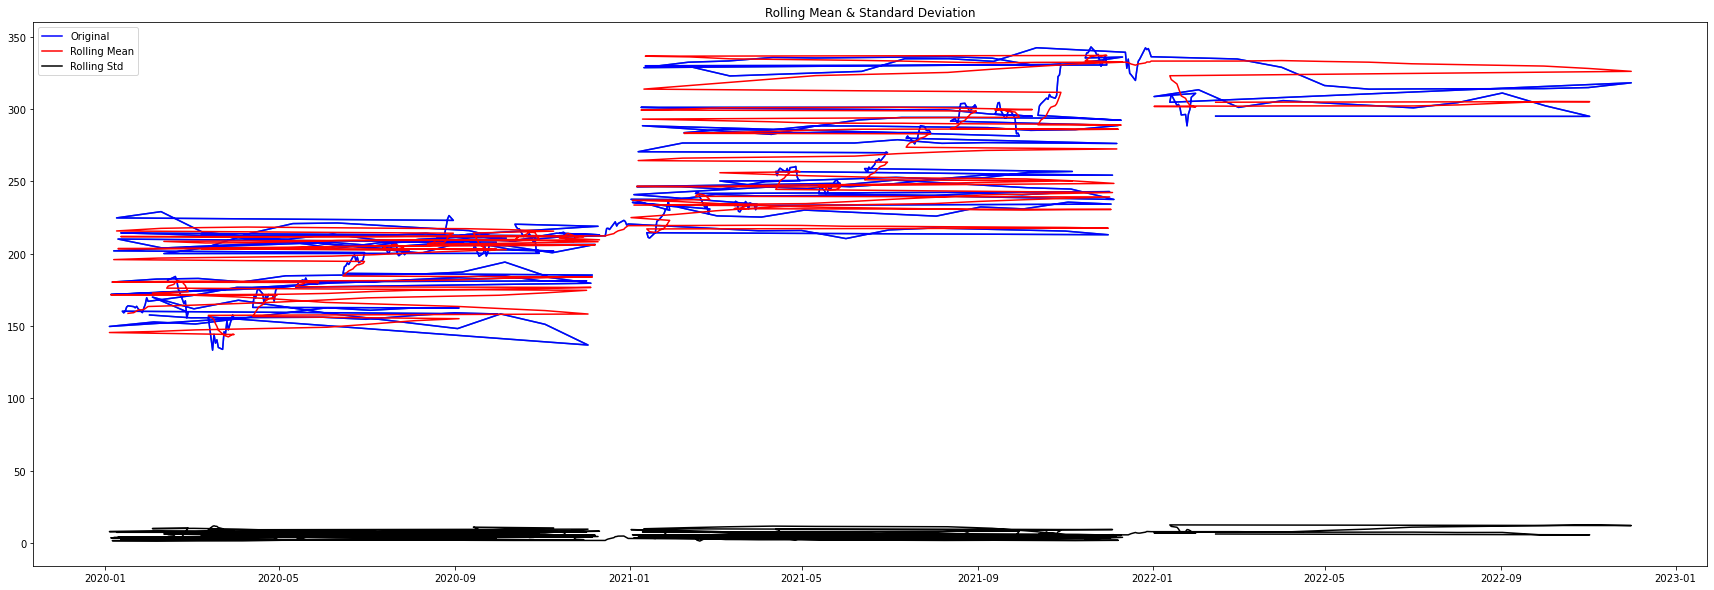

Results of Dickey-Fuller Test:
Test Statistic                  -1.364314
p-value                          0.599260
#Lags Used                       9.000000
Number of Observations Used    525.000000
Critical Value (1%)             -3.442867
Critical Value (5%)             -2.867061
Critical Value (10%)            -2.569710
dtype: float64


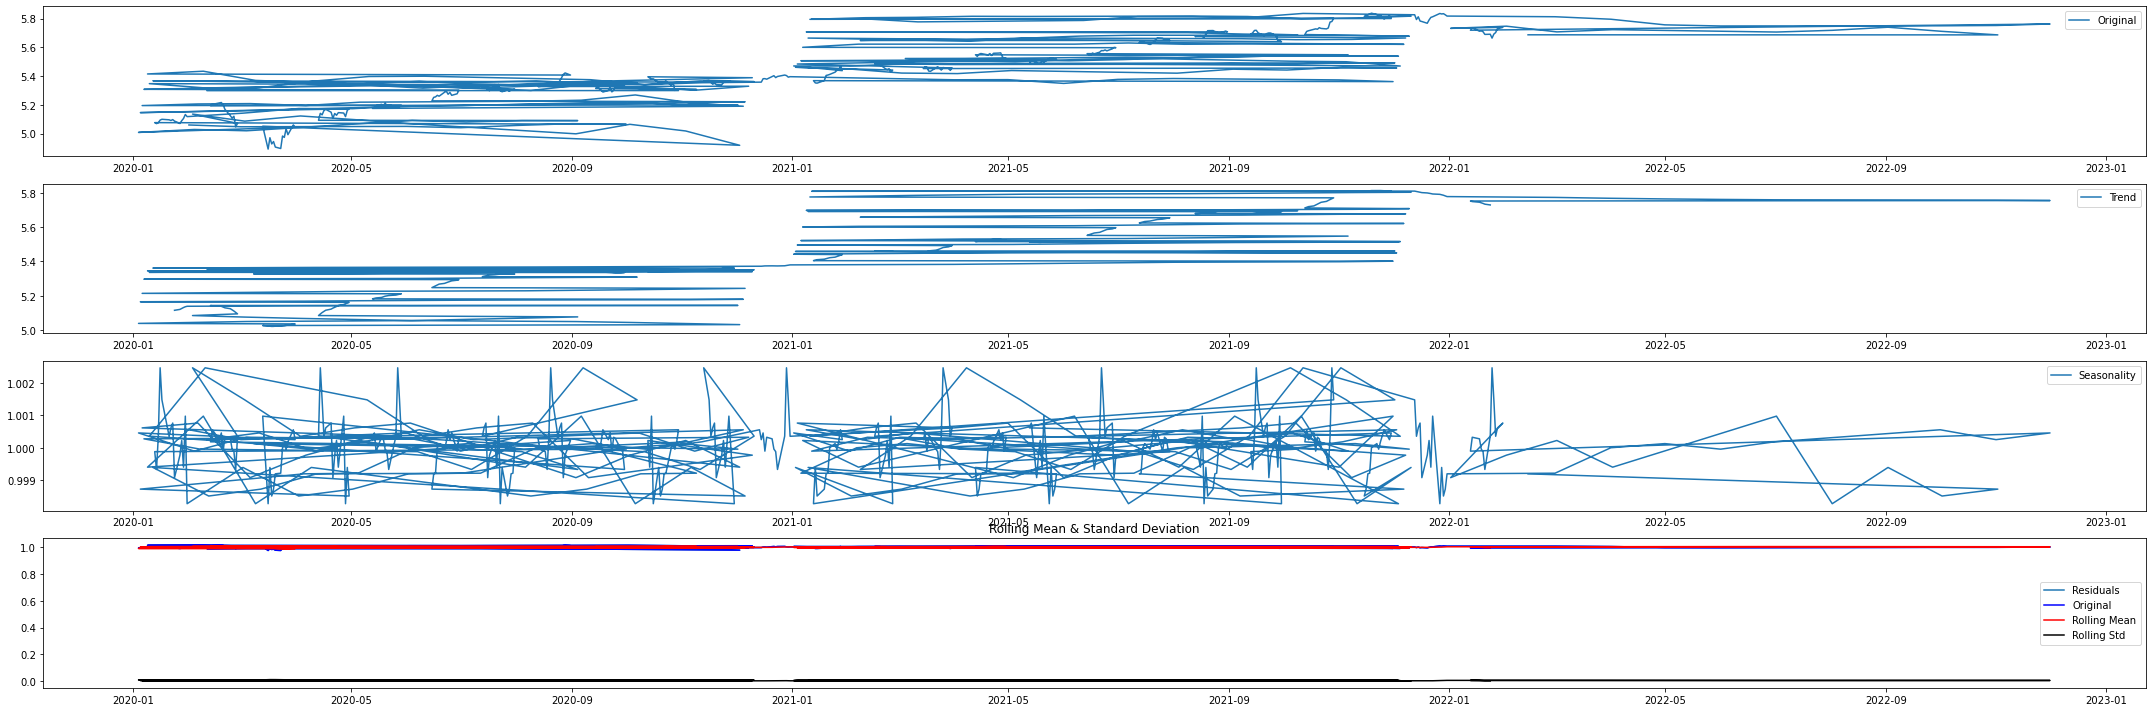

Results of Dickey-Fuller Test:
Test Statistic                -7.268238e+00
p-value                        1.613745e-10
#Lags Used                     1.800000e+01
Number of Observations Used    4.860000e+02
Critical Value (1%)           -3.443877e+00
Critical Value (5%)           -2.867505e+00
Critical Value (10%)          -2.569947e+00
dtype: float64


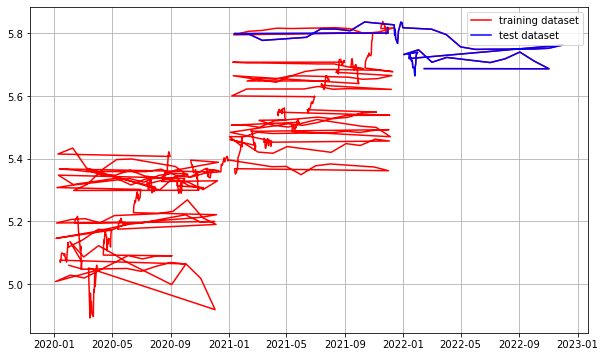

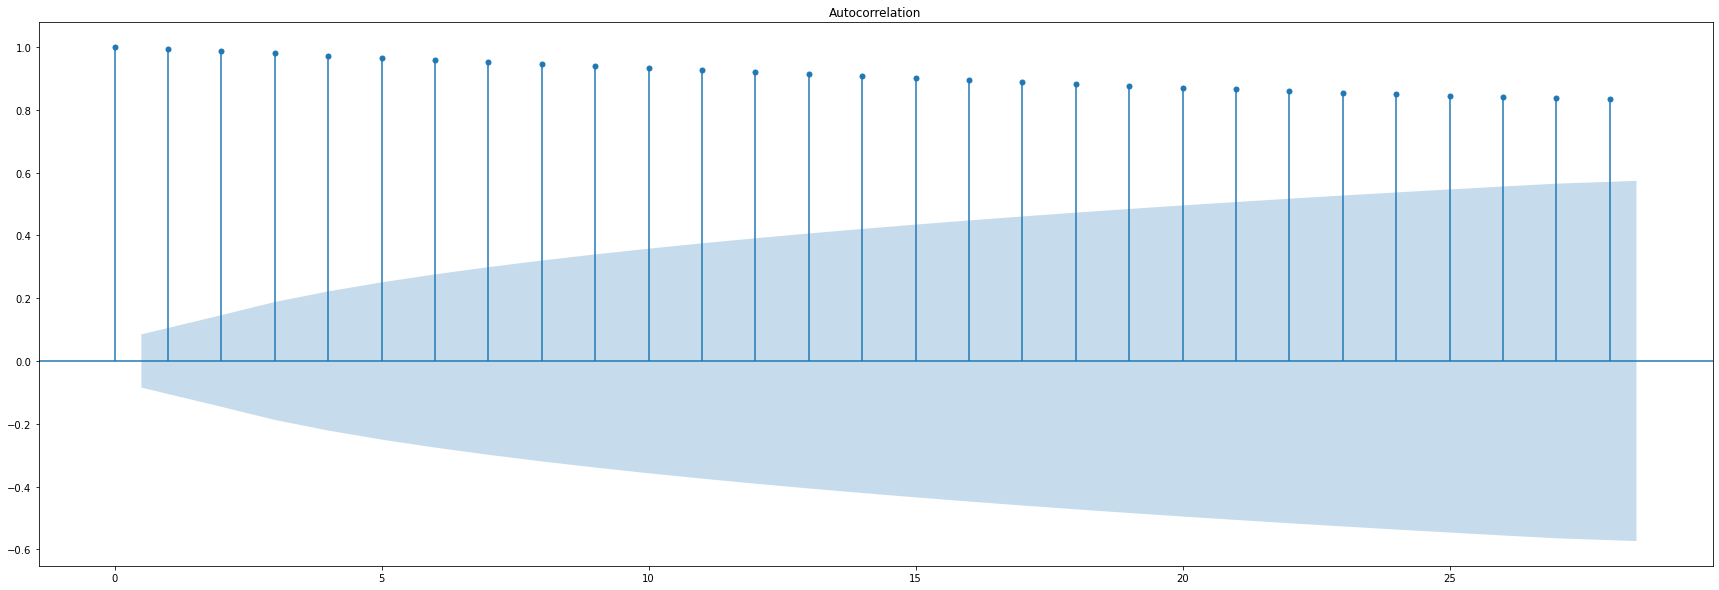

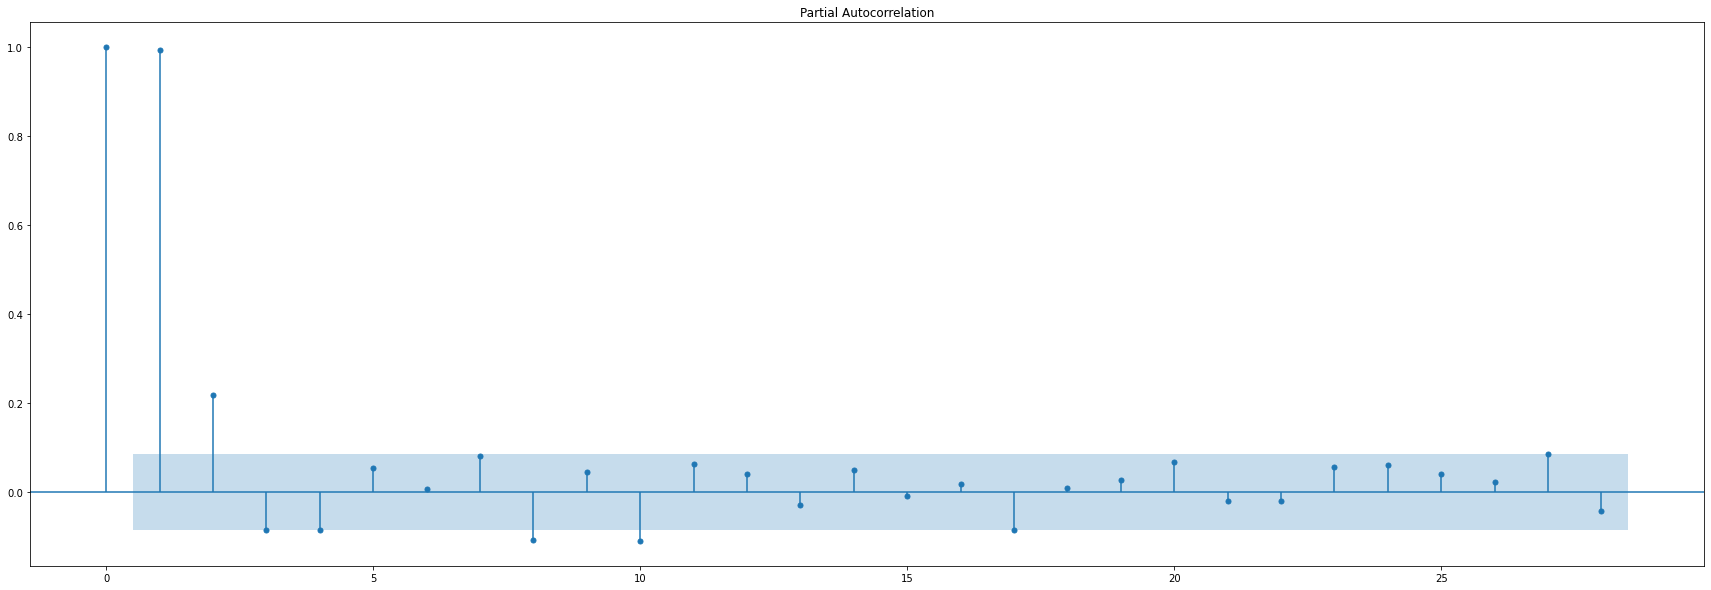

Results of Dickey-Fuller Test:
Test Statistic                -6.944154e+00
p-value                        1.007244e-09
#Lags Used                     8.000000e+00
Number of Observations Used    5.250000e+02
Critical Value (1%)           -3.442867e+00
Critical Value (5%)           -2.867061e+00
Critical Value (10%)          -2.569710e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.661486e+00
p-value                        1.349812e-16
#Lags Used                     1.500000e+01
Number of Observations Used    5.170000e+02
Critical Value (1%)           -3.443062e+00
Critical Value (5%)           -2.867147e+00
Critical Value (10%)          -2.569756e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.944154e+00
p-value                        1.007244e-09
#Lags Used                     8.000000e+00
Number of Observations Used    5.250000e+02
Critical Value (1%)           -3.442867e+00
Critical Value (5%)           -2.867061e+

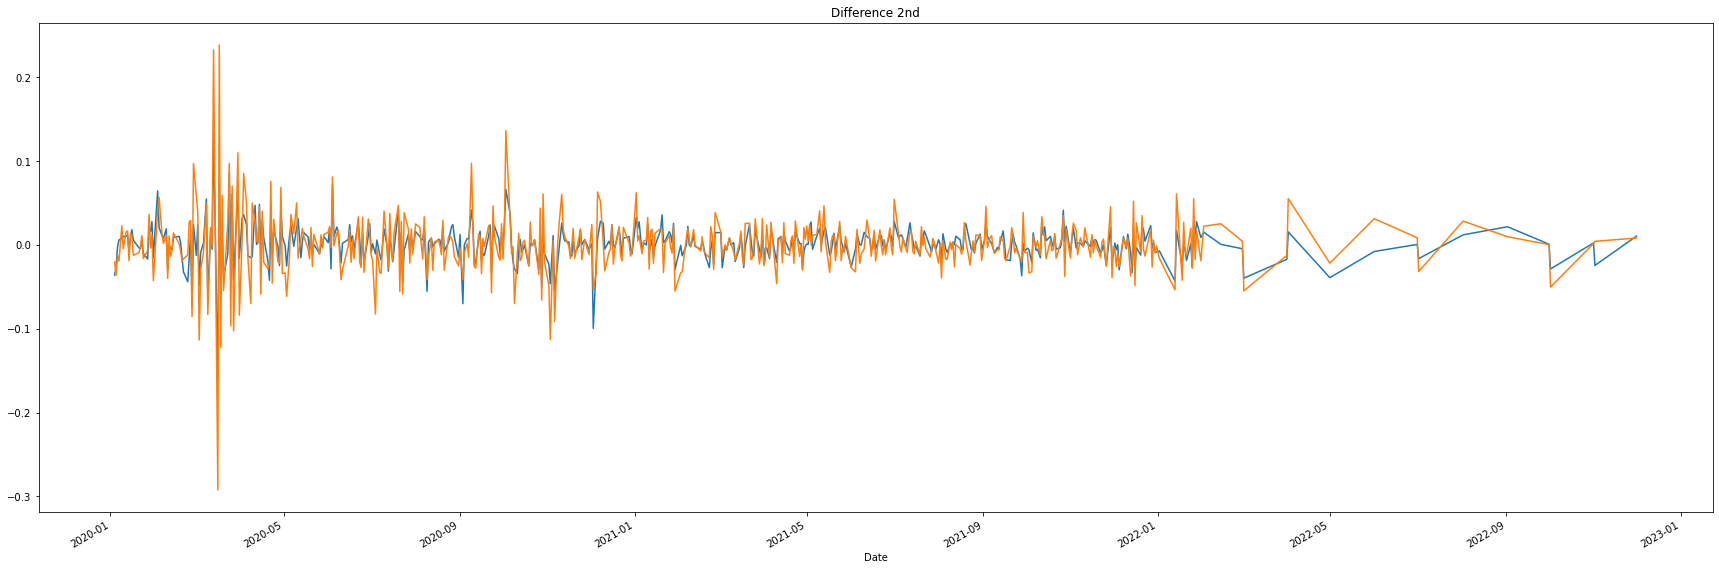

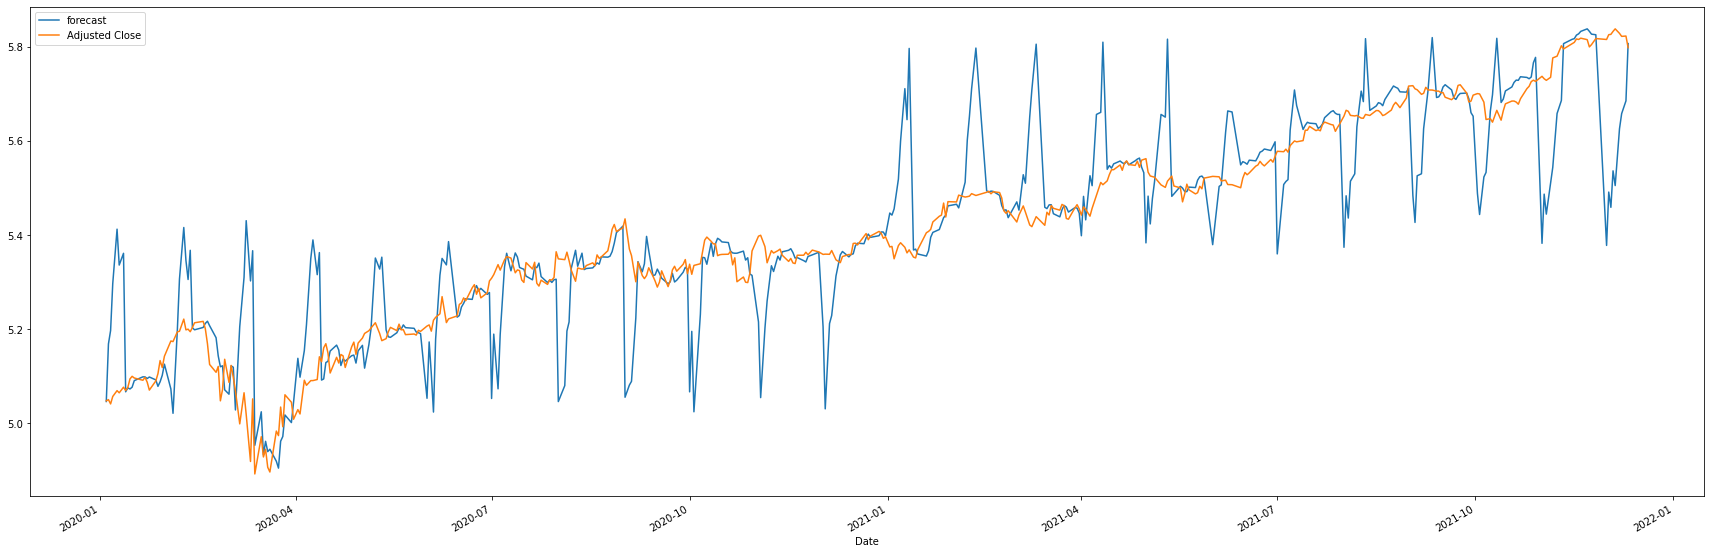

In [5]:
warnings.filterwarnings("ignore")

#apple=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/AAPL.csv')
#y_pred_apple=predictARIMA(apple,"Apple")


#amazon=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/AMZN.csv')
#y_pred_amazon=predictARIMA(amazon,"Amazon")


#facebook=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/FB.csv')
#y_pred_fb=predictARIMA(facebook,"Facebook")


#google=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/GOOG.csv')
#y_pred_google=predictARIMA(google,"Google")


microsoft=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/MSFT.csv')
y_pred_ms=predictARIMA(microsoft,"Microsoft")

#netflix=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/NFLX.csv')
#y_pred_netflix=predictARIMA(netflix,"Netflix")